## Rainfall Prediction

### Problem Statement:

To predict the amount rainfall that tells us how many inches of rainfall can we expect.

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

### Brief Summary:

After observing the data carefully, I noticed that there were some ambiguities in the data. Like, there were some rows containing "-", the "PrecipitationSumInches" column contains some T values instead of some numeric values.

I noticed that the column 'Events' is not required in further analysis as it only gives the same information that we can get from rest of the columns. Also, Date column could cause ambiguity in the anlysis, so I have deleted columns 'Date' and 'Events'. Moreover, I removed the rows with missing values (or that contains "-" and "T"). 

After cleaning the data in Excel itslef, I saved it in the file named **austin_weather_final**. 

In [2]:
# Importing data
data = pd.read_csv("C:\\Vikram\\Data Science\\Rainfall Prediction\\austin_weather_final.csv")
data.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0.00
2,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0.00
3,61,46,31,36,28,21,89,56,22,30.56,30.45,30.30,10,10,7,12,4,20,0.00
4,57,48,39,39,36,33,79,63,47,30.47,30.40,30.34,10,9,7,12,3,17,0.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TempHighF                   1183 non-null   int64  
 1   TempAvgF                    1183 non-null   int64  
 2   TempLowF                    1183 non-null   int64  
 3   DewPointHighF               1183 non-null   int64  
 4   DewPointAvgF                1183 non-null   int64  
 5   DewPointLowF                1183 non-null   int64  
 6   HumidityHighPercent         1183 non-null   int64  
 7   HumidityAvgPercent          1183 non-null   int64  
 8   HumidityLowPercent          1183 non-null   int64  
 9   SeaLevelPressureHighInches  1183 non-null   float64
 10  SeaLevelPressureAvgInches   1183 non-null   float64
 11  SeaLevelPressureLowInches   1183 non-null   float64
 12  VisibilityHighMiles         1183 non-null   int64  
 13  VisibilityAvgMiles          1183 

- There are 1183 rows with 19 columns.
- There are not Null values in the data. 

In [4]:
data.describe()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
count,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,80.952663,70.528318,59.601014,61.310228,56.384615,50.678783,87.739645,66.272189,44.295858,30.111412,30.022096,29.931175,9.990702,9.139476,6.808115,13.191040,4.975486,21.300085,0.127380
std,14.841901,14.142399,14.343669,13.719980,14.984651,16.281365,11.193643,12.744009,17.279440,0.180415,0.172844,0.172662,0.171826,1.477979,3.756263,3.436249,2.069088,5.878959,0.450287
min,32.000000,29.000000,19.000000,13.000000,8.000000,2.000000,37.000000,27.000000,10.000000,29.630000,29.550000,29.410000,5.000000,2.000000,0.000000,6.000000,1.000000,9.000000,0.000000
25%,72.000000,61.000000,49.000000,52.000000,46.000000,38.000000,84.000000,59.000000,31.000000,29.990000,29.910000,29.820000,10.000000,9.000000,2.000000,10.000000,3.000000,17.000000,0.000000
50%,83.000000,73.000000,62.000000,66.000000,61.000000,55.000000,90.000000,66.000000,42.000000,30.080000,30.000000,29.910000,10.000000,10.000000,9.000000,13.000000,5.000000,21.000000,0.000000
75%,93.000000,83.000000,73.000000,73.000000,69.000000,65.000000,94.000000,74.000000,54.000000,30.210000,30.100000,30.020000,10.000000,10.000000,10.000000,15.000000,6.000000,25.000000,0.010000
max,107.000000,93.000000,81.000000,80.000000,76.000000,75.000000,100.000000,97.000000,93.000000,30.830000,30.740000,30.610000,10.000000,10.000000,10.000000,29.000000,12.000000,57.000000,5.200000


In [5]:
data.columns

Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureHighInches',
       'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches'],
      dtype='object')

The minimum level of precipitation is 0 inches and maximum level of preciptation is 5.2 inches. Let us note down the indices of rows where the precipitation is greater than 4 inches.

In [6]:
idx = data.PrecipitationSumInches[data.PrecipitationSumInches>4].index
idx = list(idx)
idx

[470, 604, 610]

We have been given the rainfall data from 21st Decmeber 2013 to 31st July 2017. Let us now plot the Precipitation graph to visualize the distribution of precipitation in inches across the given time period. 

In the graph below, 3 red stars represents the maximum level of precipitation observed in the given period.

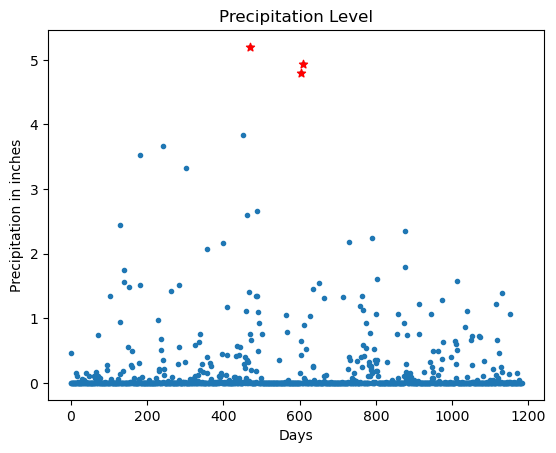

In [7]:
data.PrecipitationSumInches.plot(linestyle='', marker='.')
plt.scatter(idx, data.PrecipitationSumInches[idx], c= "r", marker="*", zorder=2)
plt.title('Precipitation Level')
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
plt.show()

Let us now split the data into features and response. Features are the variables used to predict the response variable, while response variable is the variable which needs to predict.

In [8]:
X = data.drop('PrecipitationSumInches', axis=1)
y = data['PrecipitationSumInches']

Before we fit the regression model for making prediction, let us plot the graphs for average temperature(F), average dew point(F), average humidity(%), average sea level(inches), average visibity (miles), and average wind (miles per hours).

In [9]:
# Making the separate DataFrame for required variables
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'])

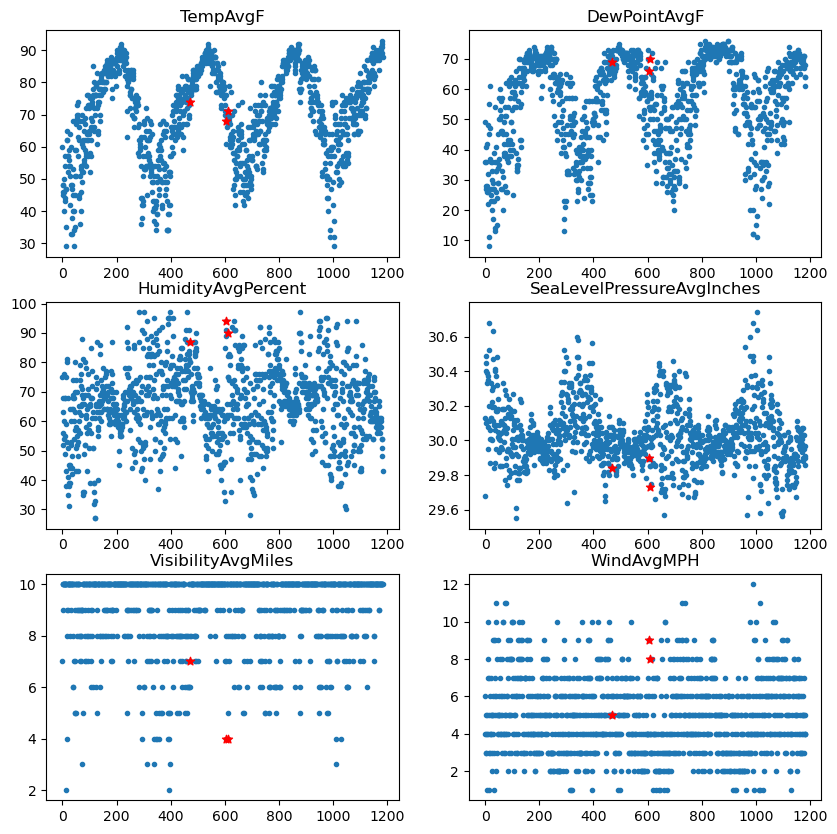

In [10]:
plt.figure(figsize=(10,10))
for i in range(x_vis.columns.size):
    plt.subplot(3,2,i+1)
    x_vis.iloc[:,i].plot(linestyle='',marker='.')
    plt.scatter(idx, x_vis.iloc[:,i][idx], c= "r", marker="*", zorder=2)
    plt.title(x_vis.columns[i])

plt.show()

Recall, 3 red stars represents the maximum level of precipitation observed in the given period. 

**Observations:**
- Greater the average dew point and average humidity, greater the precipitation levels.
- Precipitation level and dew point, humidity are high positively correlated compared to rest of the variables. 
- There is some extent of relation between rainfall level and rest of the variables.

Let us now fit the regression model and investigate further.

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)
print("Linear regression model is fitted successfully!")

Linear regression model is fitted successfully!


In [12]:
model_score = model.score(X,y)
print("Linear Regression model score is", model_score)

Linear Regression model score is 0.3318170215430041


This suggest that only **33.18%** of variation in the variable "PrecipitationSumInches" explained by the fitted regssion model. Since the score of the regression model is significantly low, we can not actually use this model for prediction. Let us consider the following possible observation and try to predict the precipitation in inches using the fitted regression model.

Let us consider that the list of the variables

['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches', 'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles','WindHighMPH', 'WindAvgMPH', 'WindGustMPH'] 

take values 

[72, 61, 49, 52, 46, 38, 84, 59, 31,29.99, 29.91, 29.82, 10, 9,  2, 10,  3, 17].

In [13]:
import numpy as np
inp = np.array([[72],[61],[49],[52],[46],[38],[84],[59],[31],[29.99],[29.91],[29.82],[10],[9],[2],[10],[3],[17]])
inp = inp.reshape(1, -1)
inp

array([[72.  , 61.  , 49.  , 52.  , 46.  , 38.  , 84.  , 59.  , 31.  ,
        29.99, 29.91, 29.82, 10.  ,  9.  ,  2.  , 10.  ,  3.  , 17.  ]])

In [14]:
model.predict(inp)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.06367047])

**The fitted linear regression model predicts the precipitation level as -0.06367047 inches, which can not possible in practice.**